# **End To End Deep Learning Project In Agriculture Domain.**



- **Problem Statement**

    - Farmers who grow potatoes are facing lot of economic losses every year because of various diseases that can happen to potato plant.

    - There are two common diases.

        - Early Blight( Caused By Fungus )

        - Late Blight( Caused By Micro-organism )

    - If farmer can detect these diseases early and apply appropriate treatement it can save lot of waste and prevent economic loss.

    - The treatments for **early blight** and **late blight** are little different. So it is important that we accurately identify what kind of diases is there in that potato plant.

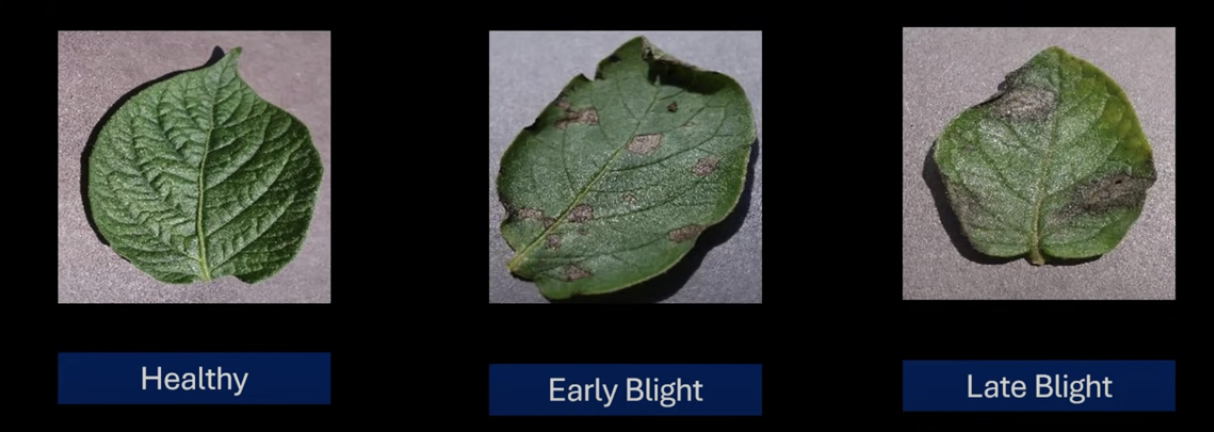

- Web Development

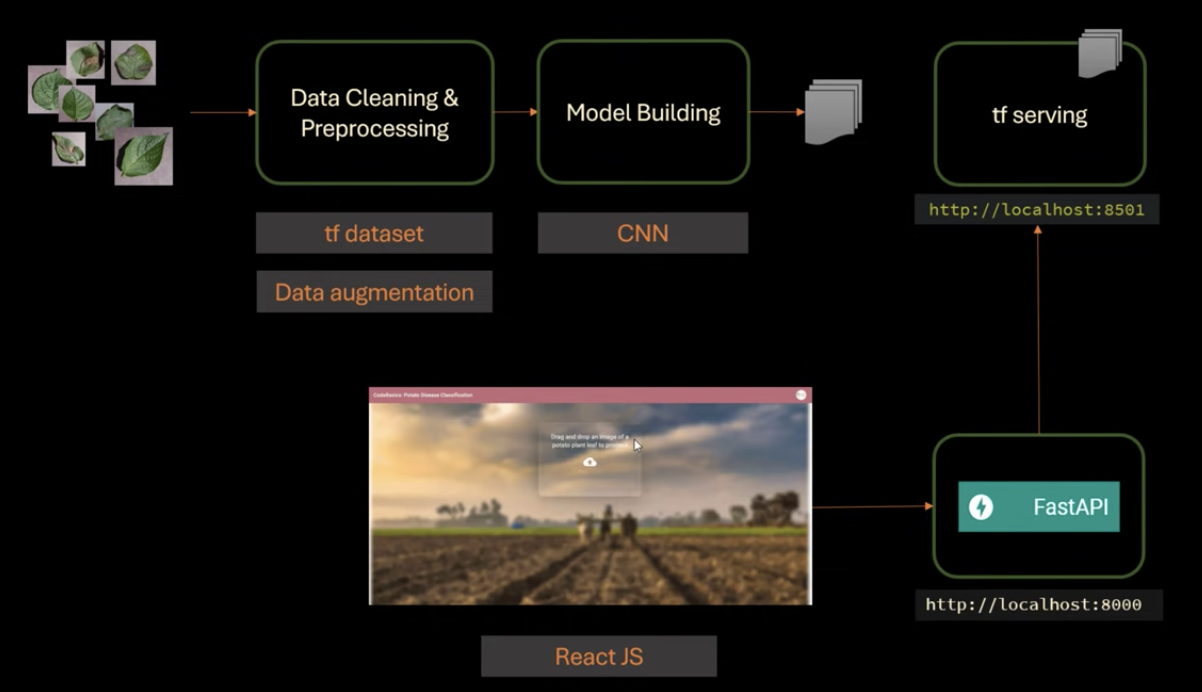

- App Development

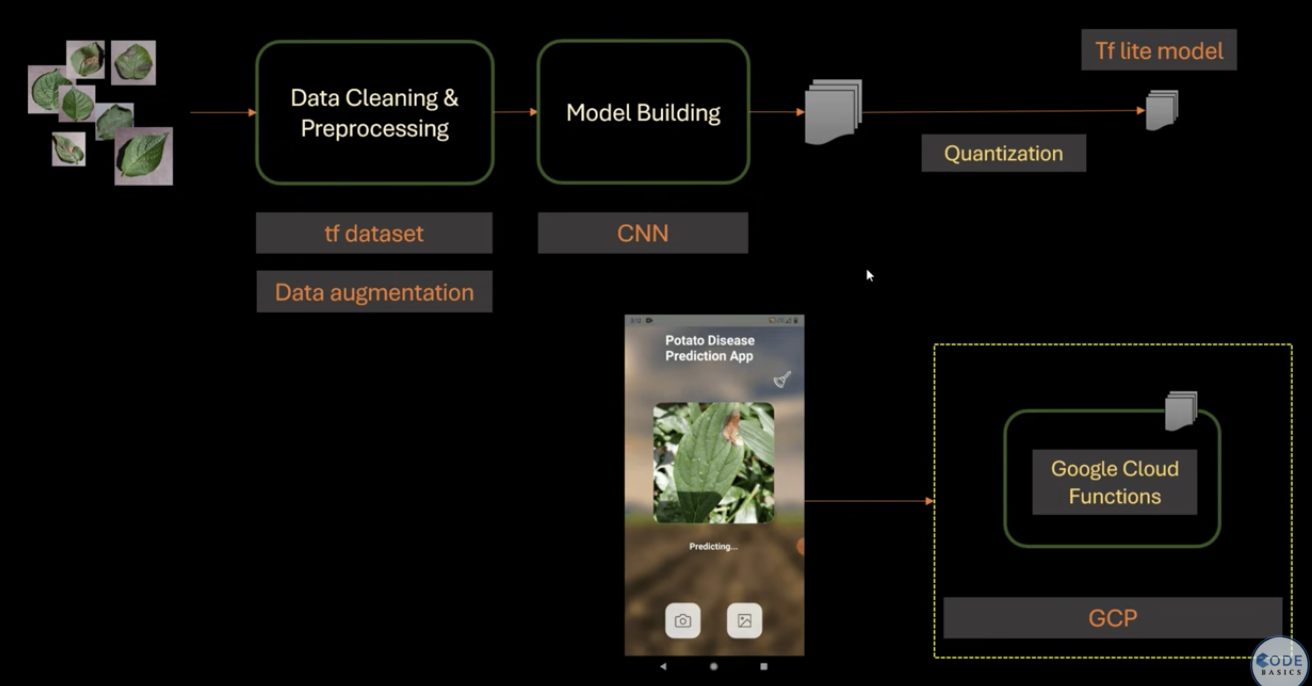

- **Techstack**


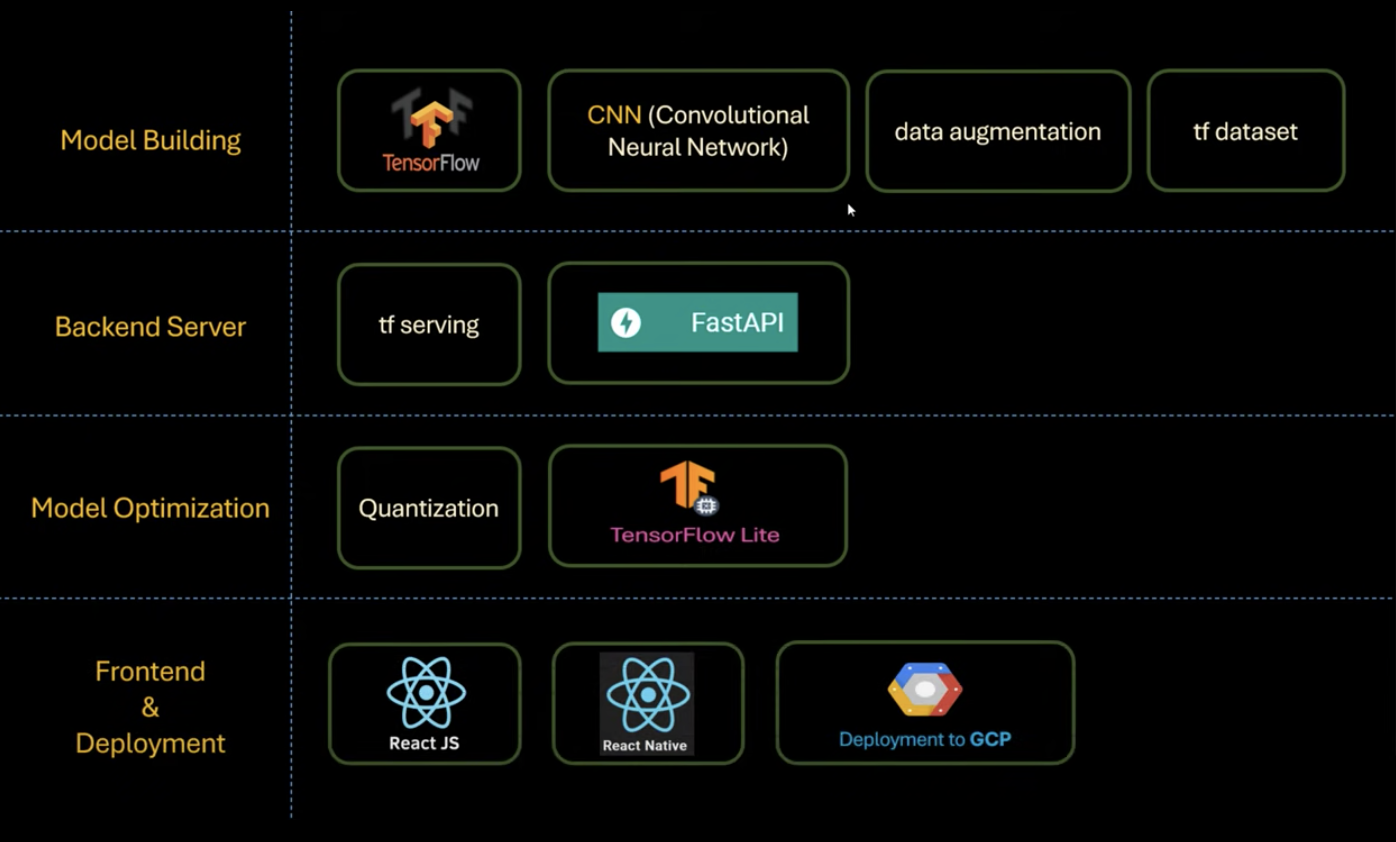

**Data Collection**

- There are three ways to collect data.

    - Buy data from third party vendor(Kaggle).

    - Collect and annotate data on your own.

        - Expensive. 

        - Time Consuming.

    - Write web scrapping scripts to collect images from internet.

- Dataset Link

    - https://www.kaggle.com/datasets/arjuntejaswi/plant-village/code

**Import Necessary Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt


2024-04-11 17:02:59.533433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/macbook/Desktop/DeepLearningEndToEnd/dEnv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


**Load the data using tf.data.Dataset**


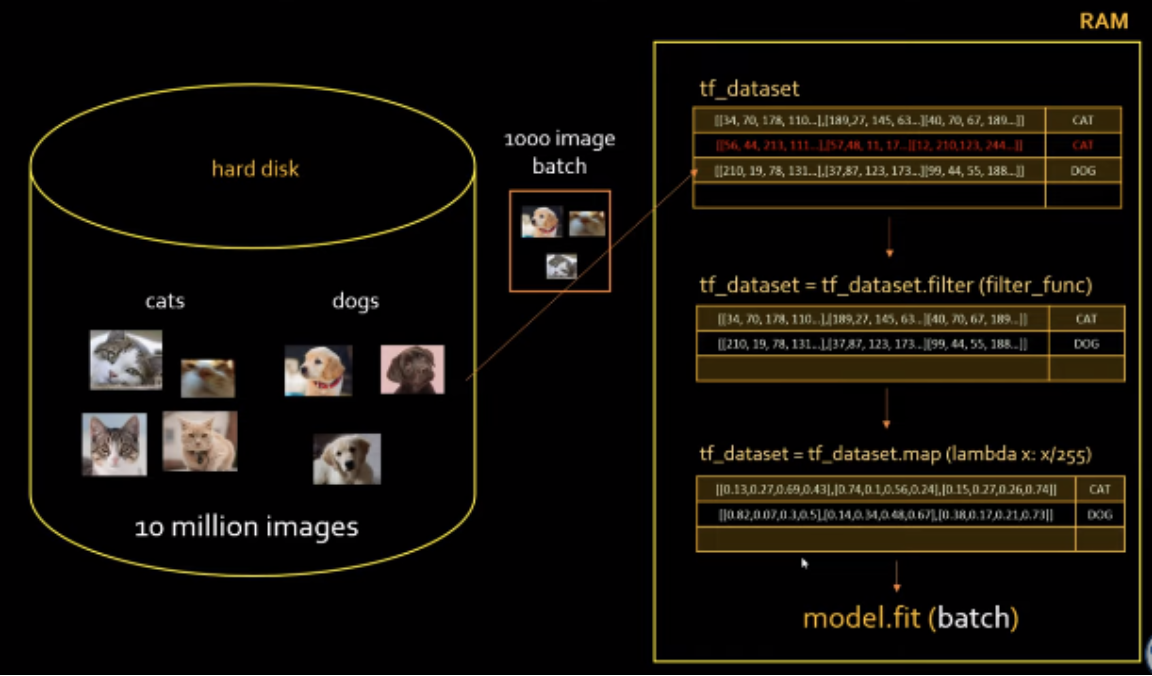


**SET CONSTANTS**

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

**IMPORT DATA INTO TF.DATA.DATASET OBJECT**

- We will use image_dataset_from_directory api to load all the images in tensorflow dataset.


- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../dataset/PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
# Basically class_names is folder names.
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# Every element in dataset is batch of 32 images. 
# Total 68 element in dataset.
# The number of images in dataset is 68 * 32
len(dataset)

68

In [6]:
68 * 32

2176

In [7]:
# It will give you first batch(32 images).
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
(32,)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


2024-04-11 17:03:19.412239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


```
(32, 256, 256, 3)
```

Total Images = 32
IMAGE_SIZE = ( 256 , 256 )
CHANNELS = 3 ( R , G , B )
IMAGE_ARRAY = ( 256 , 256  , 3 )

```
We have total 32 images and each image has one label.
```

In [9]:

for image_batch , label_batch in dataset.take(1):
    print(image_batch[0])


tf.Tensor(
[[[163. 161. 172.]
  [129. 127. 138.]
  [108. 106. 117.]
  ...
  [163. 161. 175.]
  [158. 156. 170.]
  [153. 151. 165.]]

 [[149. 147. 158.]
  [ 98.  96. 107.]
  [144. 142. 153.]
  ...
  [159. 157. 171.]
  [165. 163. 177.]
  [168. 166. 180.]]

 [[100.  98. 109.]
  [117. 115. 126.]
  [188. 186. 199.]
  ...
  [163. 161. 175.]
  [164. 162. 176.]
  [164. 162. 176.]]

 ...

 [[142. 138. 153.]
  [120. 116. 131.]
  [136. 132. 147.]
  ...
  [180. 178. 191.]
  [178. 176. 189.]
  [189. 187. 200.]]

 [[118. 114. 129.]
  [102.  98. 113.]
  [157. 153. 168.]
  ...
  [177. 175. 188.]
  [172. 170. 183.]
  [177. 175. 188.]]

 [[123. 119. 134.]
  [128. 124. 139.]
  [148. 144. 159.]
  ...
  [205. 203. 216.]
  [188. 186. 199.]
  [173. 171. 184.]]], shape=(256, 256, 3), dtype=float32)


2024-04-11 17:03:22.145016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:

for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].numpy())


[[[110. 106. 120.]
  [133. 129. 143.]
  [126. 122. 136.]
  ...
  [187. 189. 202.]
  [191. 193. 206.]
  [195. 197. 210.]]

 [[125. 121. 135.]
  [120. 116. 130.]
  [111. 107. 121.]
  ...
  [188. 190. 203.]
  [193. 195. 208.]
  [196. 198. 211.]]

 [[104. 100. 114.]
  [100.  96. 110.]
  [108. 104. 118.]
  ...
  [188. 190. 203.]
  [189. 191. 204.]
  [191. 193. 206.]]

 ...

 [[108. 104. 119.]
  [121. 117. 132.]
  [122. 118. 133.]
  ...
  [191. 193. 205.]
  [181. 183. 195.]
  [186. 188. 200.]]

 [[111. 107. 122.]
  [123. 119. 134.]
  [122. 118. 133.]
  ...
  [173. 175. 187.]
  [195. 197. 209.]
  [187. 189. 201.]]

 [[125. 121. 136.]
  [136. 132. 147.]
  [132. 128. 143.]
  ...
  [200. 202. 214.]
  [192. 194. 206.]
  [179. 181. 193.]]]


2024-04-11 15:13:28.884106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:

for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].shape)


(256, 256, 3)


2024-04-11 17:03:25.486575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-11 17:03:27.456760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


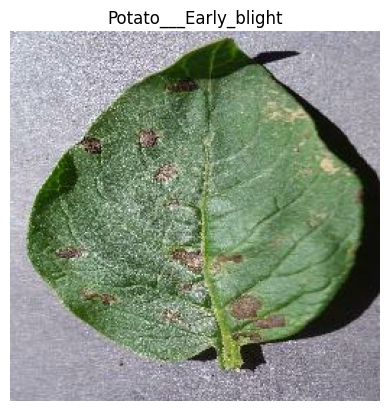

In [11]:

for image_batch , label_batch in dataset.take(1):
    plt.title( class_names[label_batch[0]])
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")


2024-04-11 17:03:29.530398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


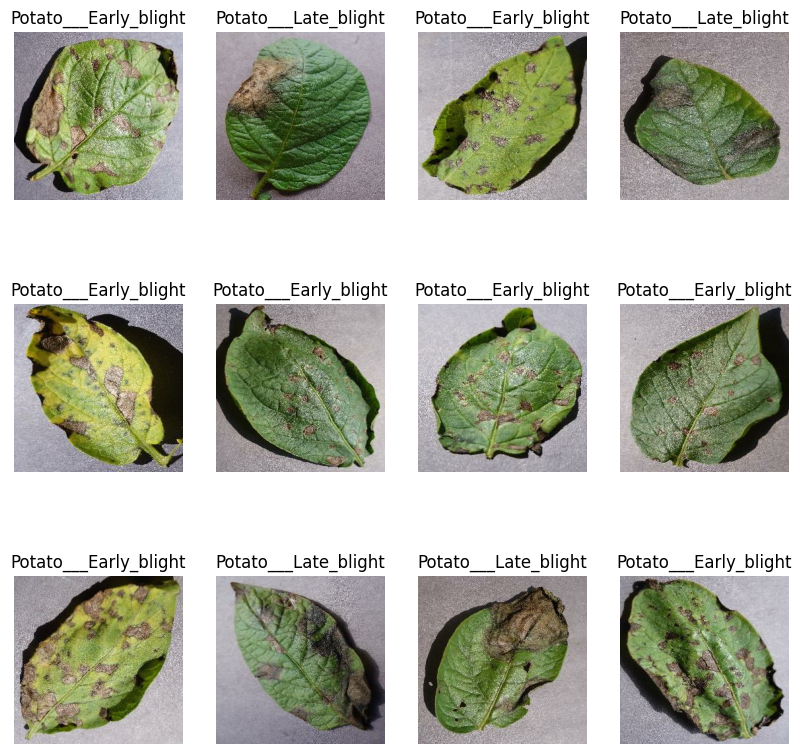

In [12]:

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

**train_test_split**

In [13]:
len(dataset)

68

- The length of dataset is 68 which means we have 68 batches and in each batch we have 32 images. 

    - 80% data is training data.

    - 20% data is validation data.

        - 10% will be validation set.

            - This validation set will be used in training process.

            - After each epoch , we will do validation on this dataset.

        - 10% will be test set.

            - It is used to measure accuracy of our model.

            - Before we deploy the model into wild , we will use this test set to check performence of test.  

In [14]:
train_size = 0.8
val_size = 0.2
test_size = 0.1
validation_size = 0.1

In [15]:
len(dataset) * 0.8

54.400000000000006

In [16]:
# It will take first 54 batches.
train_ds = dataset.take(54)
len(train_ds)

54

In [17]:
# It will skip first 54 batches.
val_ds = dataset.skip(54)
len(val_ds)

14

In [18]:
len(dataset) * 0.1

6.800000000000001

In [19]:
test_ds = val_ds.take(6)
len(test_ds)


6

In [20]:
validation_ds = val_ds.skip(6)
len(validation_ds)

8

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

**Catching & Pre-fatching**

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

**Data Preprocessing**

  - Rescaling.

    - To improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). 
    
    - This should happen while training as well as inference. 
    
    - Hence we can add that as a layer in our Sequential Model.

  - Resizing.

    - Before we feed our images to network, we should be resizing it to the desired size. 

    - Why do we need to resize (256,256) image to again (256,256)...? 
    
      - We don't need to resize image while training but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it.

In [26]:
from tensorflow.keras.layers import Resizing , Rescaling

resize_and_rescale = tf.keras.Sequential([
  Resizing(IMAGE_SIZE, IMAGE_SIZE),
  Rescaling(1./255),
])

**Data Augmentation**

  - Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

  - Create multiple augmented image from single image.

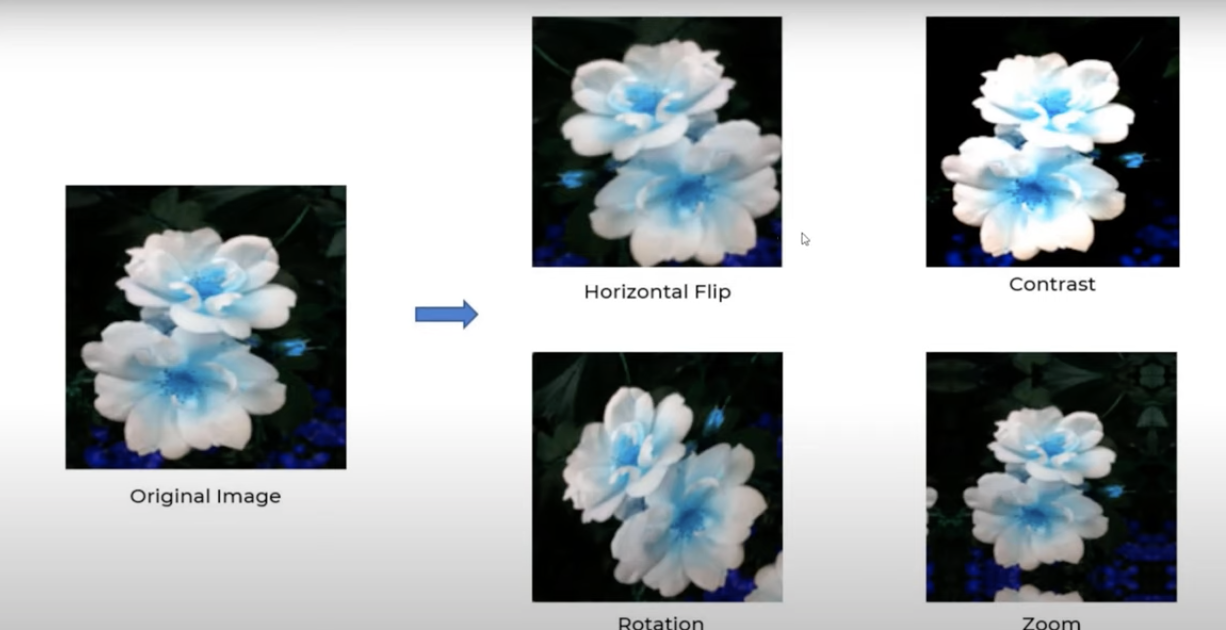

In [27]:
from tensorflow.keras.layers import RandomFlip , RandomRotation

data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

In [28]:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    # First Layer
    resize_and_rescale,
    # Second Layer
    data_augmentation,
    # Third Layer
    layers.Conv2D(32 , kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten Layer
    layers.Flatten(),
    # Dense Layer Of 64 Artificial Neuron
    layers.Dense(64, activation='relu'),
    # Last Layer.
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/Users/macbook/Desktop/DeepLearningEndToEnd/dEnv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling the Model**

  - We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric 

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

**Train Model**



In [31]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5036 - loss: 0.9329 - val_accuracy: 0.4792 - val_loss: 0.8375
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6788 - loss: 0.7453 - val_accuracy: 0.7604 - val_loss: 0.5800
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8236 - loss: 0.4070 - val_accuracy: 0.8854 - val_loss: 0.3252
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8811 - loss: 0.3163 - val_accuracy: 0.8906 - val_loss: 0.2734
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8755 - loss: 0.2854 - val_accuracy: 0.8698 - val_loss: 0.2716
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8900 - loss: 0.2590 - val_accuracy: 0.9375 - val_loss: 0.2010
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9218 - loss: 0.2049 - val_accuracy: 0.9323 - val_loss: 0.1614
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9217 - loss: 0.1824 - val_accuracy: 0.8750 - val_loss:

**Model Performence On Test Data**

In [32]:
scores = model.evaluate(test_ds)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.9474 - loss: 0.1529


[0.1901431828737259, 0.93359375]

In [33]:
history

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [34]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
# For each parameter , We have 10 values.
len(history.history['accuracy'])

10

In [37]:
history.history['accuracy']

[0.5306712985038757,
 0.7361111044883728,
 0.8229166865348816,
 0.8738425970077515,
 0.8854166865348816,
 0.9004629850387573,
 0.9224537014961243,
 0.9097222089767456,
 0.9085648059844971,
 0.921875]

In [38]:
history.history['loss']

[0.8981058597564697,
 0.6358505487442017,
 0.41170910000801086,
 0.32341307401657104,
 0.2688867449760437,
 0.24161307513713837,
 0.198765367269516,
 0.2154679298400879,
 0.22384117543697357,
 0.20226438343524933]

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

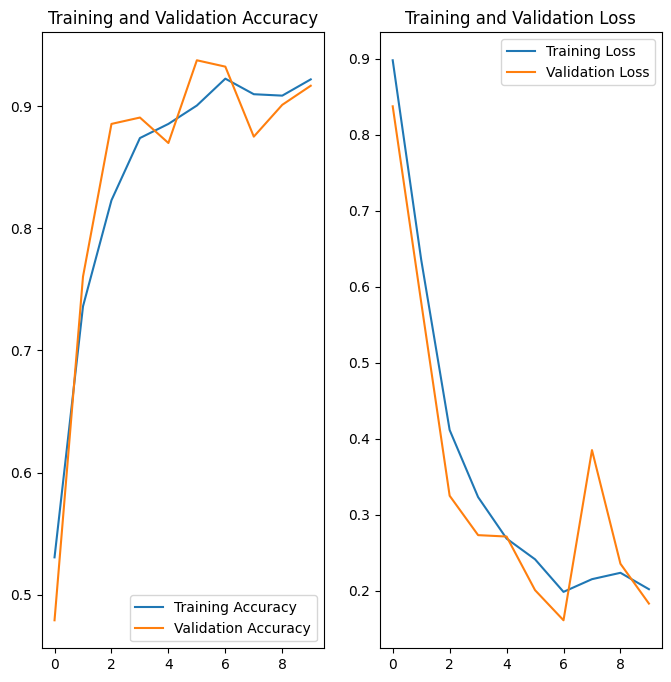

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Run prediction on a sample image**

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
predicted label: Potato___Late_blight


2024-04-11 17:37:47.355392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


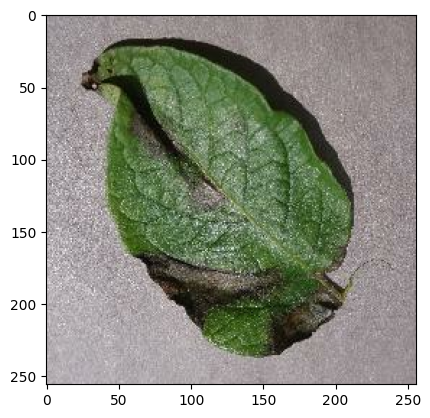

In [43]:
import numpy as np 
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    # The predict() expects the image batch.It will give the prediction of whole batch.
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

**Inference**

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


2024-04-11 18:00:27.515654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


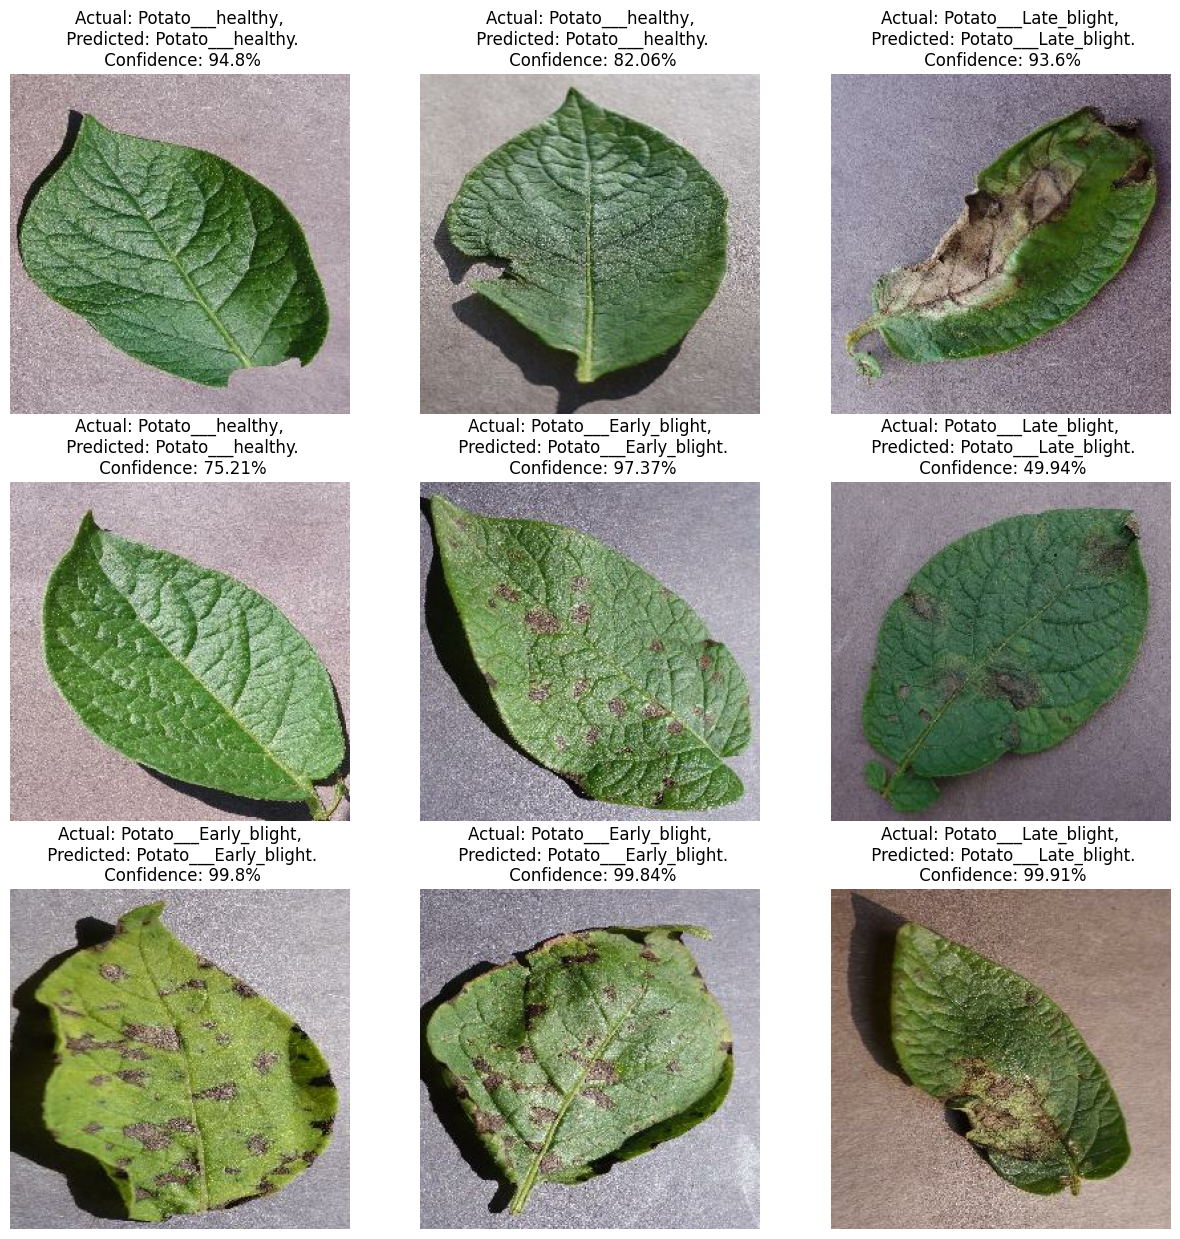

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

**Saving The Model**

In [57]:
import os
os.listdir("../saved_models")

['.DS_Store']

In [60]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models") + [0]])+1
model.export(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/1/assets


INFO:tensorflow:Assets written to: ../saved_models/1/assets


Saved artifact at '../saved_models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  5183275248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183276304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183695328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183696208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183714400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183715456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183716864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183738448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183739856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183740912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5183734176: TensorSpec(shape=(), dtype=tf.resource, name=None)
